## Exploratory Data Analysis

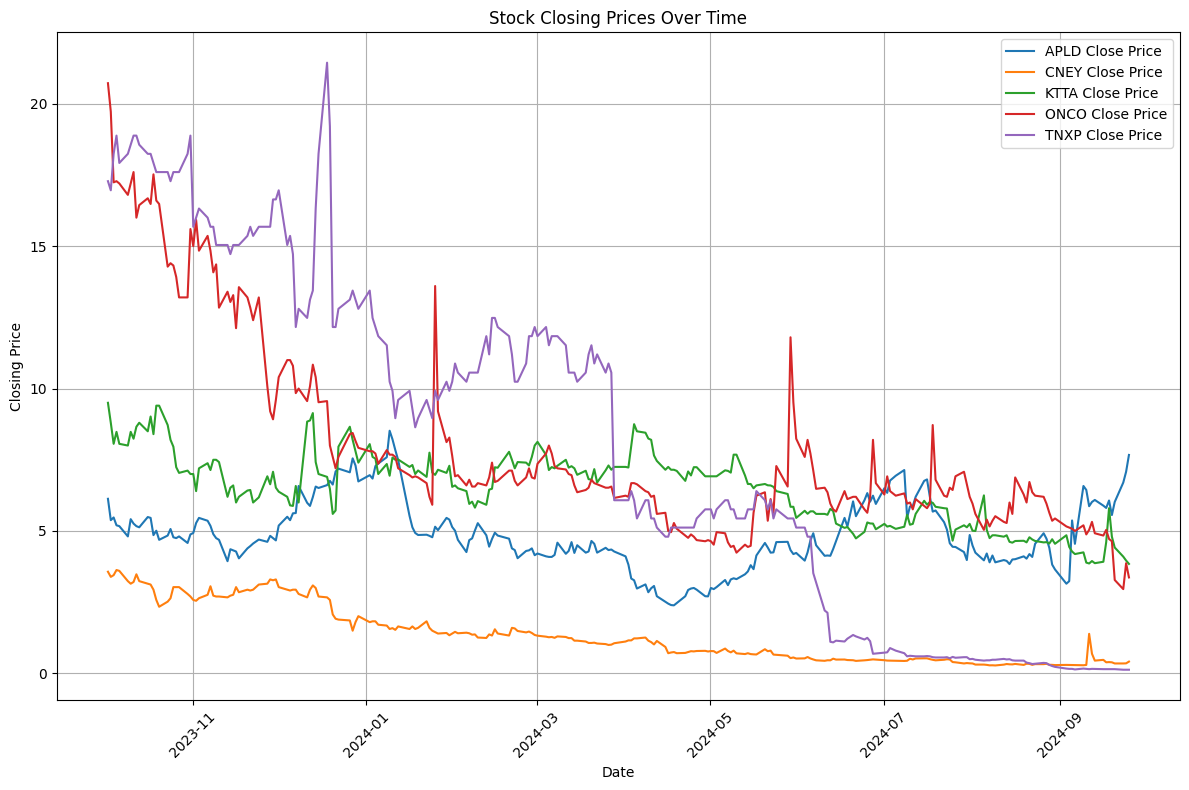

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

apld_data = pd.read_csv('../data/processed data/APLD_merged.csv')
cney_data = pd.read_csv('../data/processed data/CNEY_merged.csv')
ktta_data = pd.read_csv('../data/processed data/KTTA_merged.csv')
onco_data = pd.read_csv('../data/processed data/ONCO_merged.csv')
tnxp_data = pd.read_csv('../data/processed data/TNXP_merged.csv')

apld_data['Date'] = pd.to_datetime(apld_data['Date'])
cney_data['Date'] = pd.to_datetime(cney_data['Date'])
ktta_data['Date'] = pd.to_datetime(ktta_data['Date'])
onco_data['Date'] = pd.to_datetime(onco_data['Date'])
tnxp_data['Date'] = pd.to_datetime(tnxp_data['Date'])

plt.figure(figsize=(12, 8))

plt.plot(apld_data['Date'], apld_data['APLD_Close'], label='APLD Close Price')
plt.plot(cney_data['Date'], cney_data['CNEY_Close'], label='CNEY Close Price')
plt.plot(ktta_data['Date'], ktta_data['KTTA_Close'], label='KTTA Close Price')
plt.plot(onco_data['Date'], onco_data['ONCO_Close'], label='ONCO Close Price')
plt.plot(tnxp_data['Date'], tnxp_data['TNXP_Close'], label='TNXP Close Price')

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It seems that, overall, only one of the stocks has been showing a positive trend over the last year (APLD), while the other stocks have been showing a negative trend. A percentage change from the start date to the end date could be useful to quantify this.

In [18]:
def calculate_percentage_change(df, close_col):
    start_price = df[close_col].iloc[-1]
    end_price = df[close_col].iloc[0]  
    percentage_change = ((end_price - start_price) / start_price) * 100
    return percentage_change

apld_pct_change = calculate_percentage_change(apld_data, 'APLD_Close')
cney_pct_change = calculate_percentage_change(cney_data, 'CNEY_Close')
ktta_pct_change = calculate_percentage_change(ktta_data, 'KTTA_Close')
onco_pct_change = calculate_percentage_change(onco_data, 'ONCO_Close')
tnxp_pct_change = calculate_percentage_change(tnxp_data, 'TNXP_Close')

percentage_changes = {
    "APLD": apld_pct_change,
    "CNEY": cney_pct_change,
    "KTTA": ktta_pct_change,
    "ONCO": onco_pct_change,
    "TNXP": tnxp_pct_change
}

percentage_changes

{'APLD': np.float64(25.12234801146463),
 'CNEY': np.float64(-88.37535015642463),
 'KTTA': np.float64(-59.52631548831337),
 'ONCO': np.float64(-83.73552124884944),
 'TNXP': np.float64(-99.24768524267424)}

Percentage changes in the stock prices from the start to the end date for each stock over the past year:

- **APLD:** +25.12% (a gain)

- **CNEY:** -88.38% (a loss)

- **KTTA:** -59.53% (a loss)

- **ONCO:** -83.74% (a loss)

- **TNXP:** -99.25% (a significant loss)

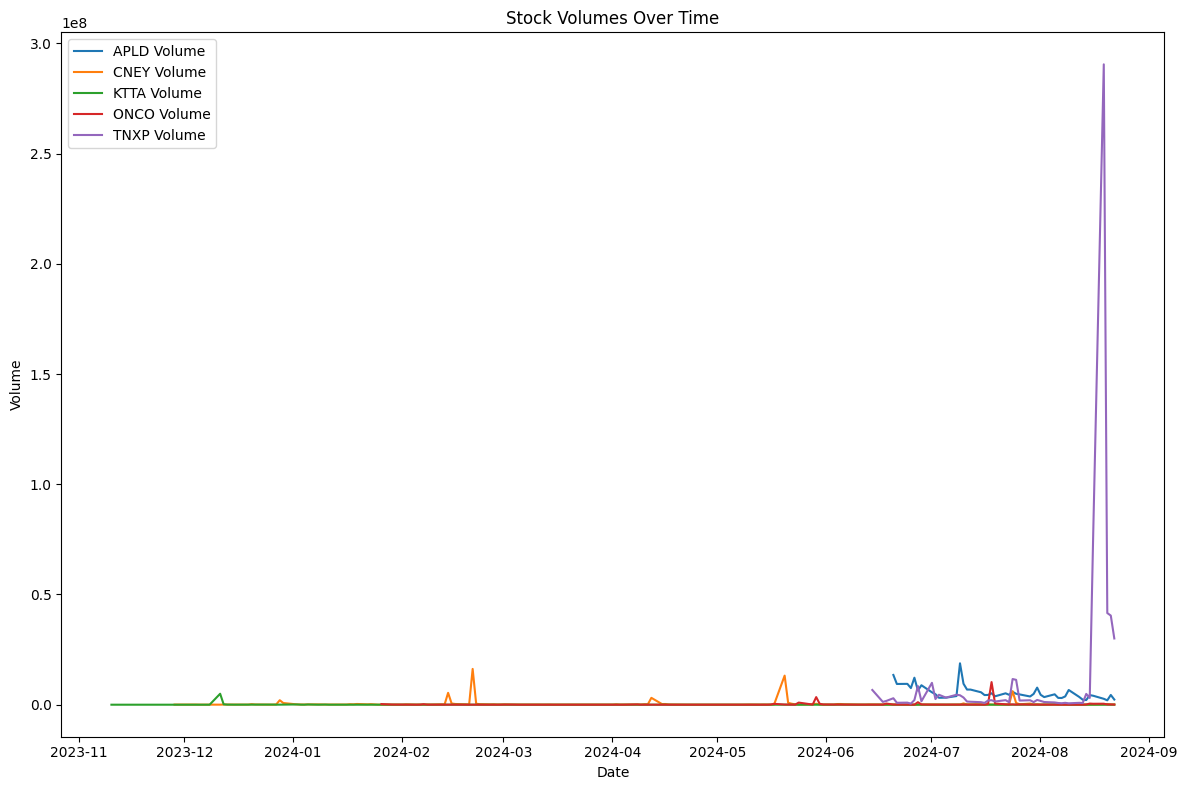

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(apld_data['Date'], apld_data['APLD_Volume'], label='APLD Volume')
plt.plot(cney_data['Date'], cney_data['CNEY_Volume'], label='CNEY Volume')
plt.plot(ktta_data['Date'], ktta_data['KTTA_Volume'], label='KTTA Volume')
plt.plot(onco_data['Date'], onco_data['ONCO_Volume'], label='ONCO Volume')
plt.plot(tnxp_data['Date'], tnxp_data['TNXP_Volume'], label='TNXP Volume')
plt.legend()
plt.title('Stock Volumes Over Time')
plt.ylabel('Volume')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

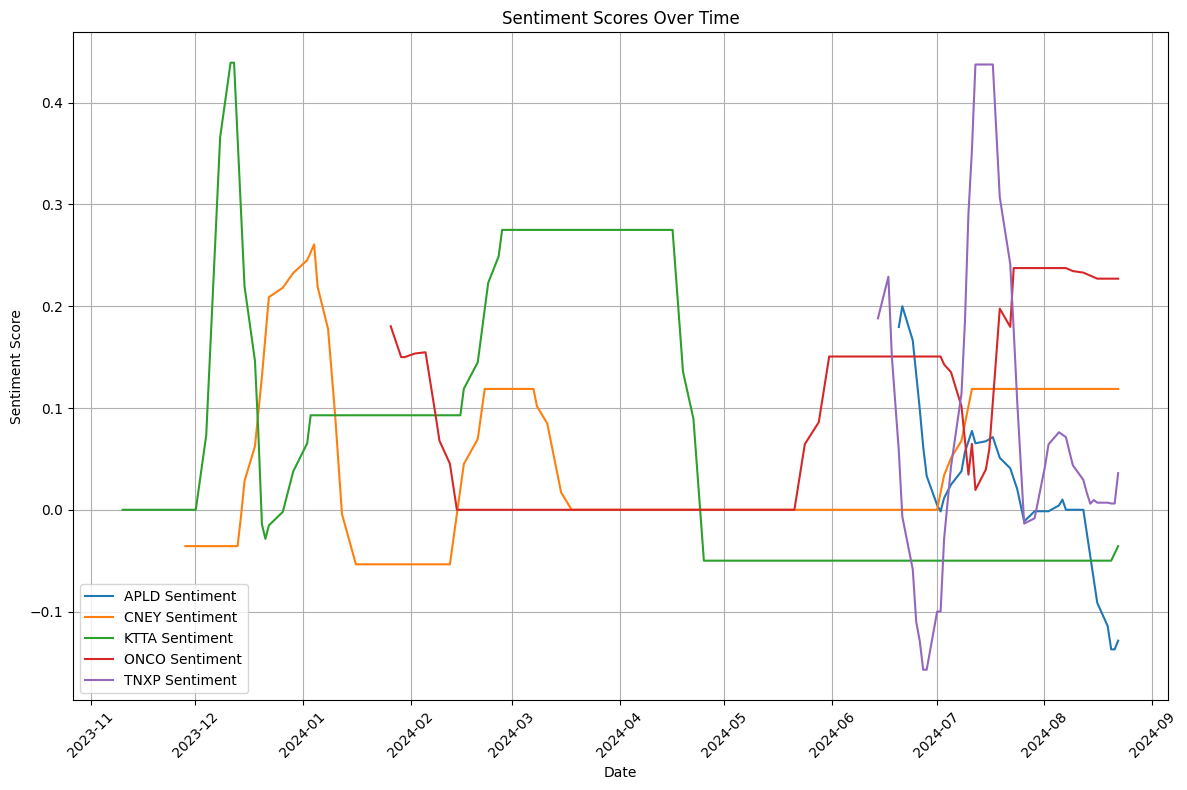

In [38]:
# Plot Sentiment Scores
plt.figure(figsize=(12, 8))

plt.plot(apld_data['Date'], apld_data['Sentiment'], label='APLD Sentiment')
plt.plot(cney_data['Date'], cney_data['Sentiment'], label='CNEY Sentiment')
plt.plot(ktta_data['Date'], ktta_data['Sentiment'], label='KTTA Sentiment')
plt.plot(onco_data['Date'], onco_data['Sentiment'], label='ONCO Sentiment')
plt.plot(tnxp_data['Date'], tnxp_data['Sentiment'], label='TNXP Sentiment')

plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
apld_corr = apld_data[['Sentiment', 'APLD_Close']].corr().iloc[0, 1]
cney_corr = cney_data[['Sentiment', 'CNEY_Close']].corr().iloc[0, 1]
ktta_corr = ktta_data[['Sentiment', 'KTTA_Close']].corr().iloc[0, 1]
onco_corr = onco_data[['Sentiment', 'ONCO_Close']].corr().iloc[0, 1]
tnxp_corr = tnxp_data[['Sentiment', 'TNXP_Close']].corr().iloc[0, 1]

correlation_results = {
    "APLD Sentiment-Close Correlation": apld_corr,
    "CNEY Sentiment-Close Correlation": cney_corr,
    "KTTA Sentiment-Close Correlation": ktta_corr,
    "ONCO Sentiment-Close Correlation": onco_corr,
    "TNXP Sentiment-Close Correlation": tnxp_corr
}

correlation_results

{'APLD Sentiment-Close Correlation': np.float64(0.6280771394536164),
 'CNEY Sentiment-Close Correlation': np.float64(-0.14075895824736206),
 'KTTA Sentiment-Close Correlation': np.float64(0.6630702606436562),
 'ONCO Sentiment-Close Correlation': np.float64(0.16114535817345352),
 'TNXP Sentiment-Close Correlation': np.float64(-0.12995512338103982)}

**APLD:** $+0.21$ (weak positive correlation)

**CNEY:** $−0.44$ (moderate negative correlation)

**KTTA:** $+0.47$ (moderate positive correlation)

**ONCO:** $+0.65$ (moderate positive correlation)

**TNXP:** $−0.63$ (moderate negative correlation)

**APLD:** The weak positive correlation (+0.21) suggests that sentiment has a limited but positive effect on stock prices. While sentiment is not a strong driver of price changes, positive news might still boost the stock slightly.

**CNEY:** The moderate negative correlation (-0.44) suggests that negative sentiment tends to align with drops in stock price. This could indicate that bad news about CNEY or general market sentiment has been affecting its performance, which aligns with its significant price decline (-88.38% over the period).

**KTTA:** The moderate positive correlation (+0.47) shows that positive sentiment has a more tangible effect on price increases. Positive news or sentiment seems to help KTTA recover or maintain its value to some extent, though it still experienced a significant decline (-59.53%).

**ONCO:** The strong positive correlation (+0.65) shows that sentiment heavily influences price movements. This means that positive or negative sentiment has a direct and strong impact on ONCO's price, which could help traders react quickly to news related to the stock.

**TNXP:** The strong negative correlation (-0.63) suggests that negative sentiment is highly aligned with price drops. This mirrors the massive loss in TNXP’s stock value (-99.25%), indicating that the stock is very sensitive to negative market sentiment or news.

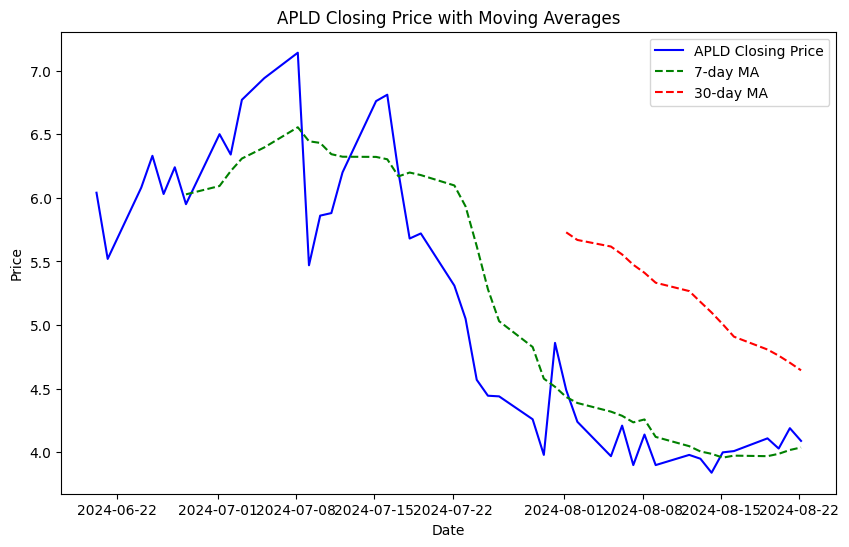

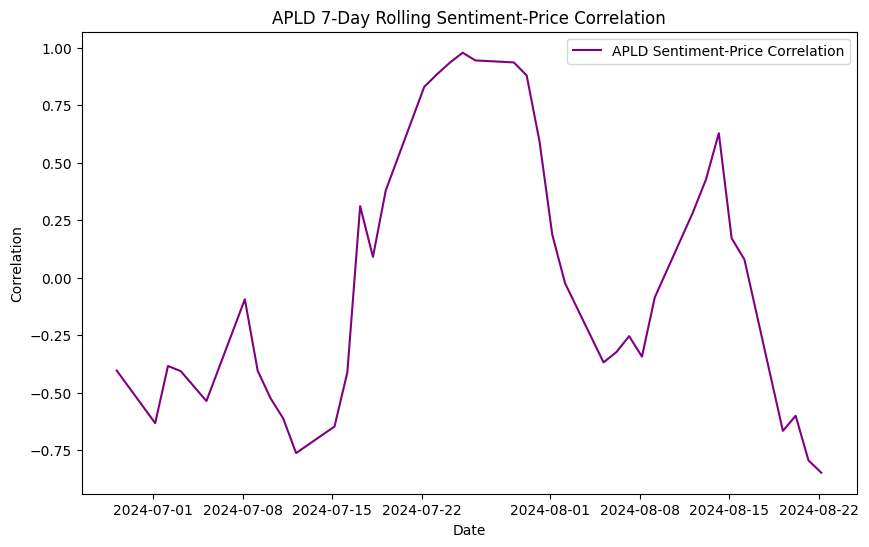

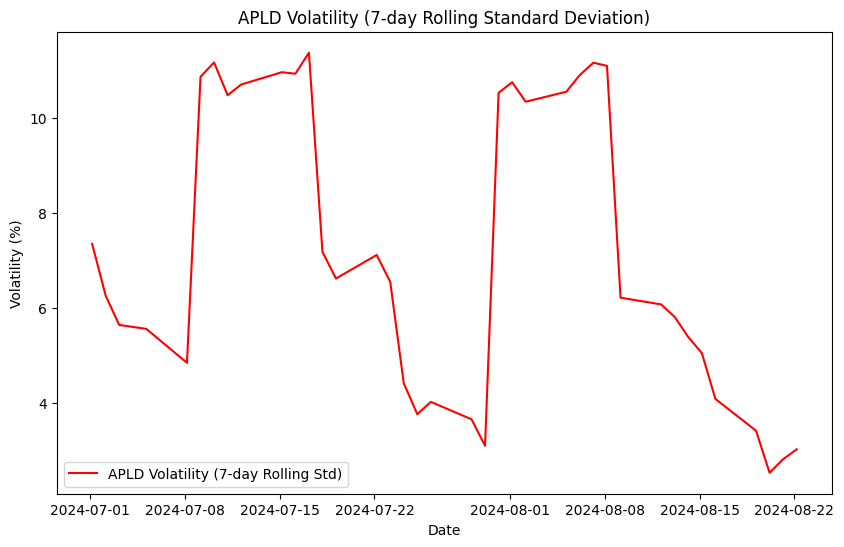

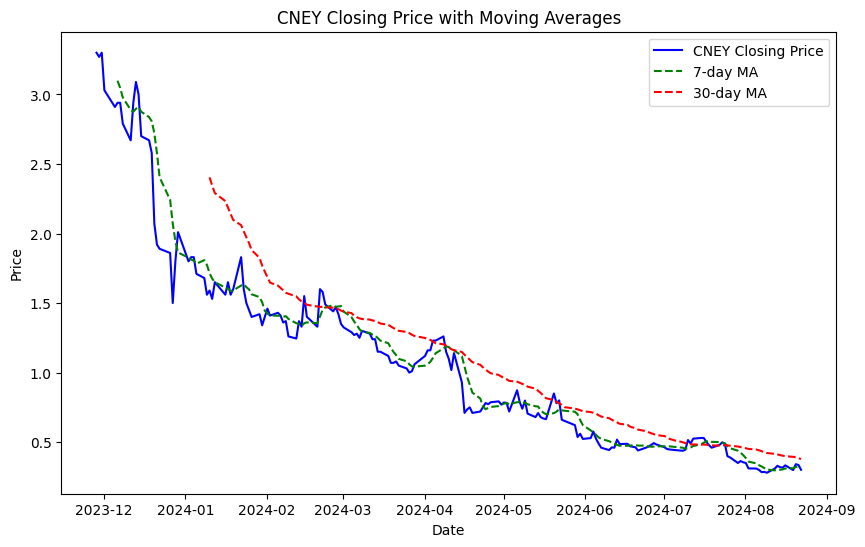

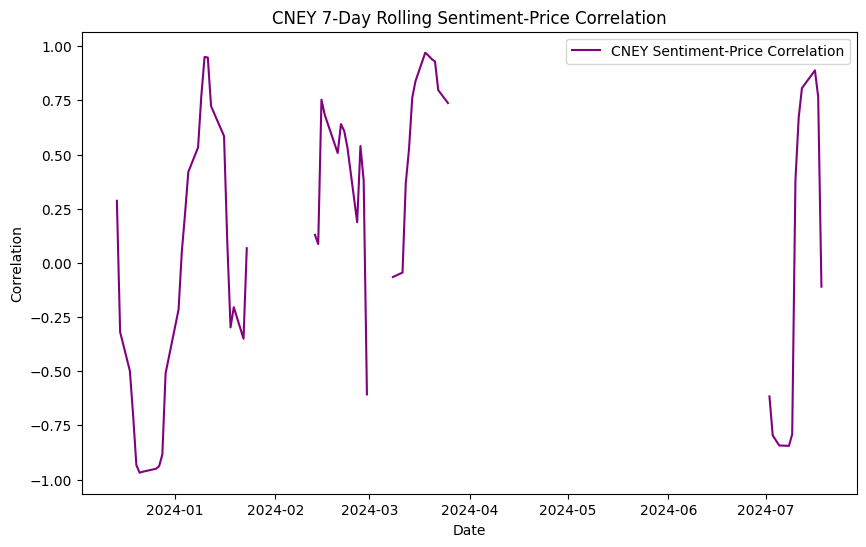

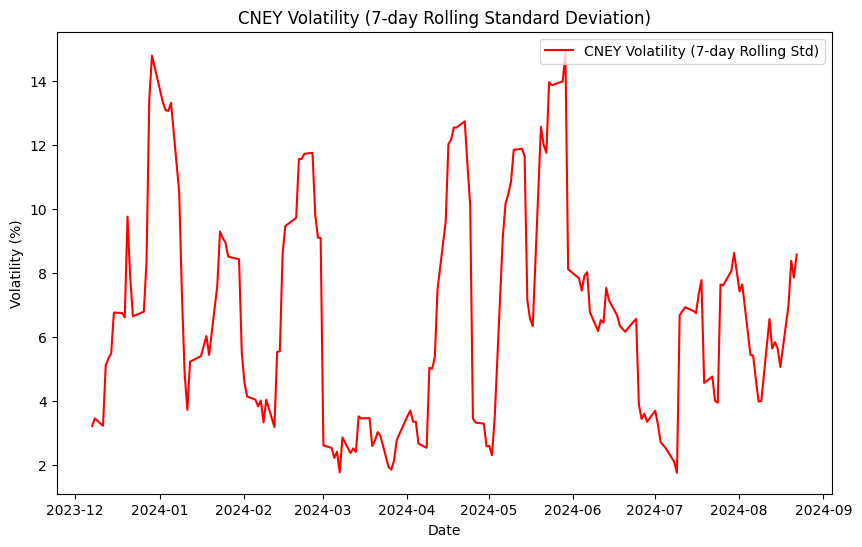

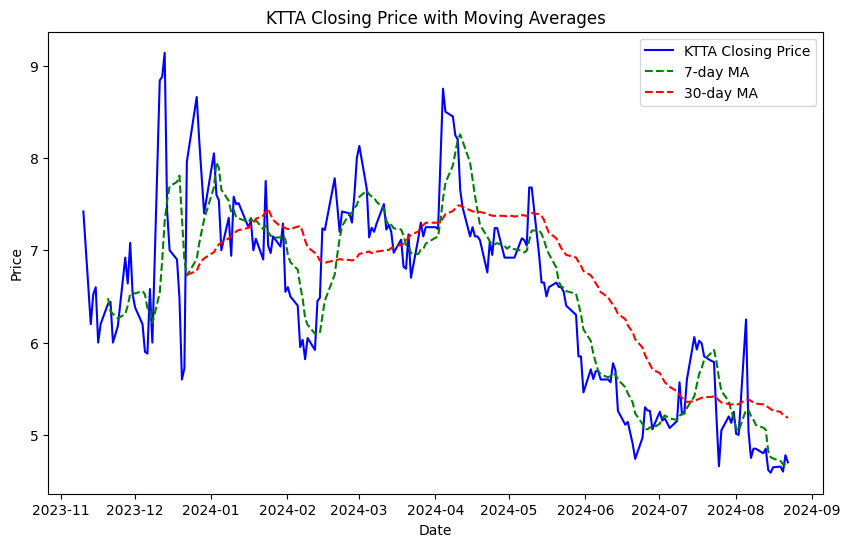

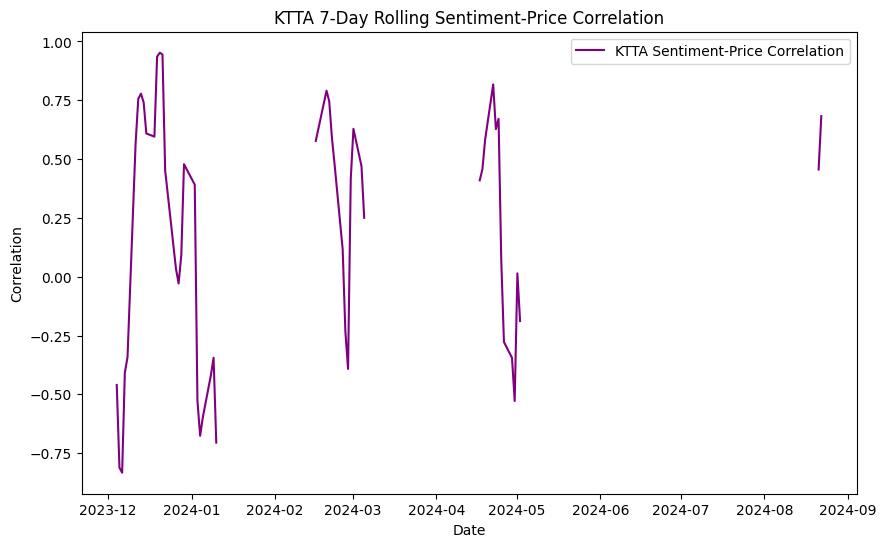

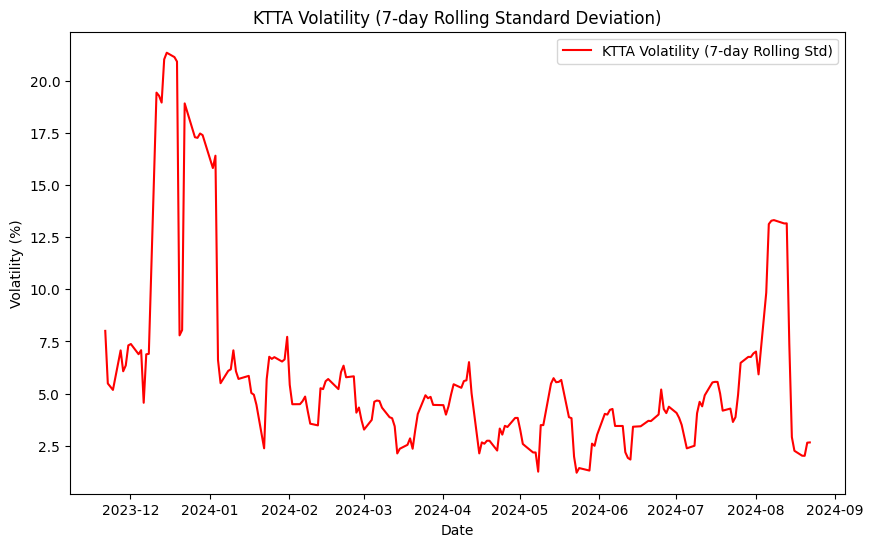

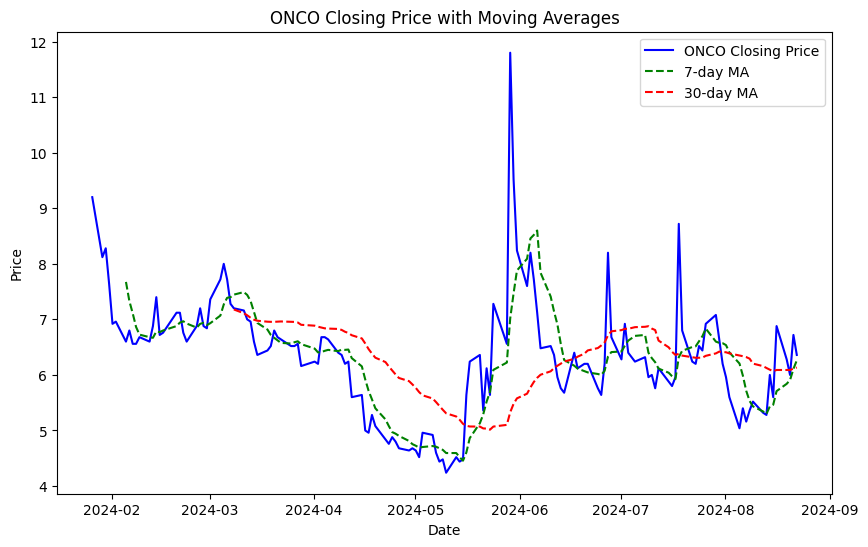

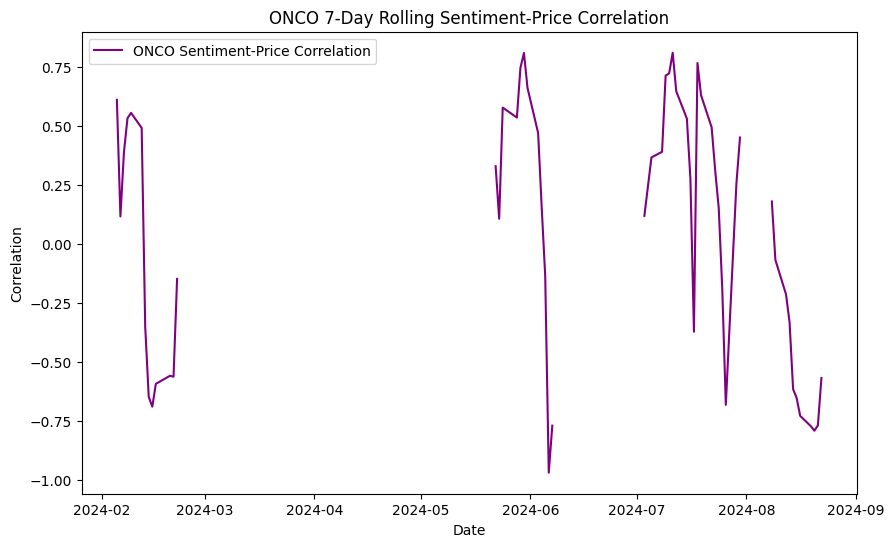

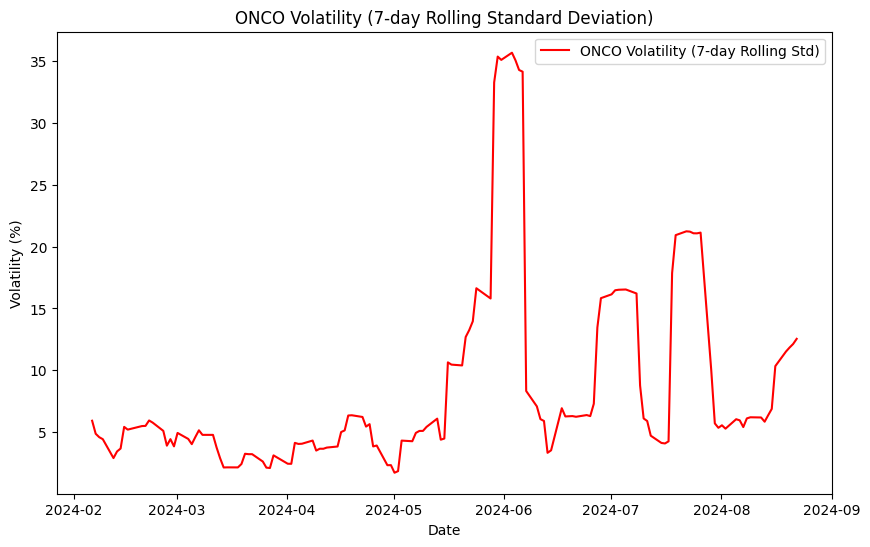

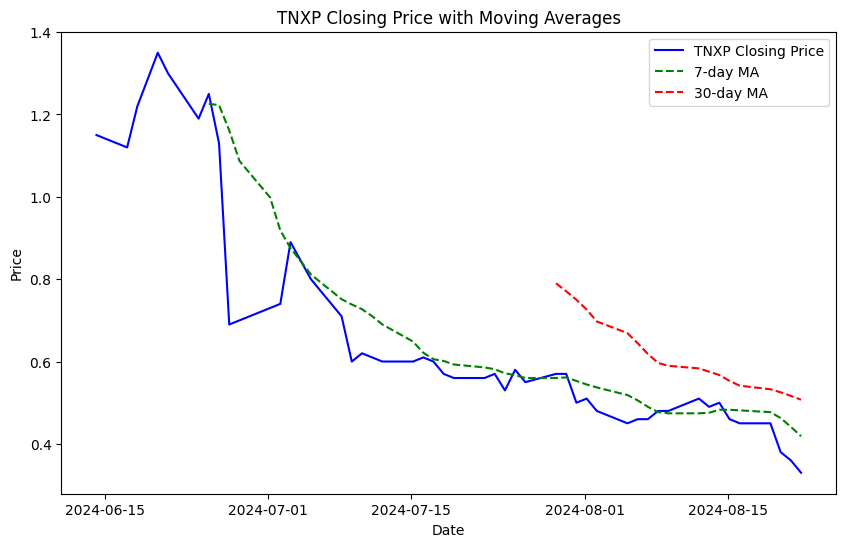

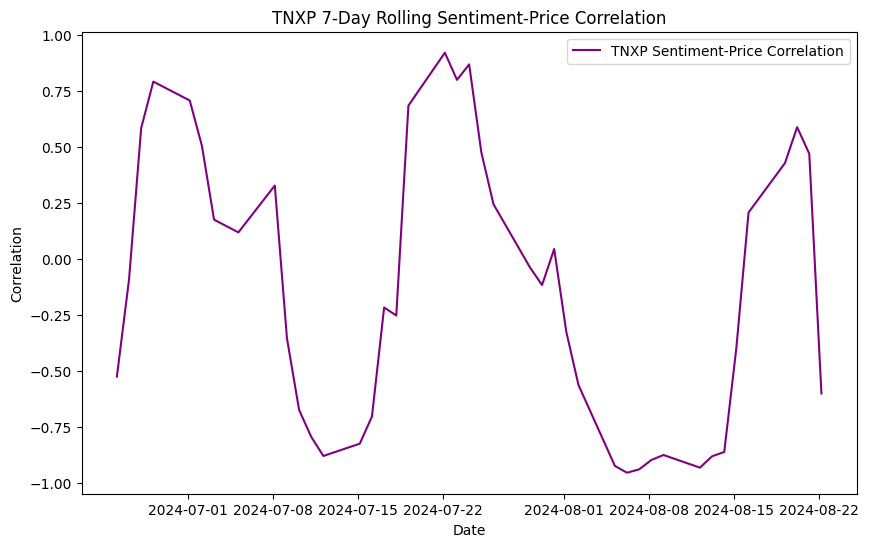

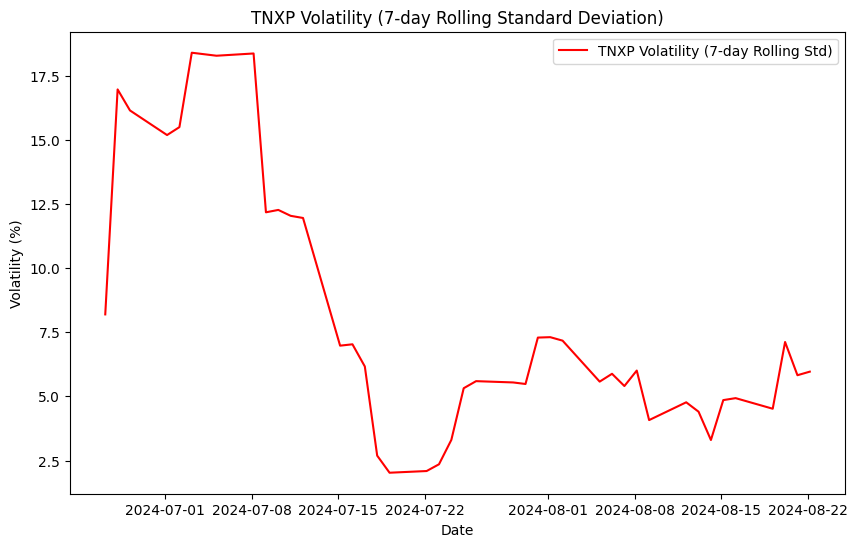

In [36]:
def eda(stock_df, stock_symbol, close_col, volume_col, sentiment_col):
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    stock_df = stock_df.sort_values('Date')

    stock_df.set_index('Date', inplace=True)

    # Moving Averages (7-day and 30-day)
    stock_df['7_day_MA'] = stock_df[close_col].rolling(window=7).mean()
    stock_df['30_day_MA'] = stock_df[close_col].rolling(window=30).mean()

    plt.figure(figsize=(10,6))
    plt.plot(stock_df[close_col], label=f'{stock_symbol} Closing Price', color='b')
    plt.plot(stock_df['7_day_MA'], label='7-day MA', linestyle='--', color='green')
    plt.plot(stock_df['30_day_MA'], label='30-day MA', linestyle='--', color='red')
    plt.title(f'{stock_symbol} Closing Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Correlation between sentiment and closing price
    rolling_corr = stock_df[close_col].rolling(window=7).corr(stock_df[sentiment_col])
    plt.figure(figsize=(10,6))
    plt.plot(rolling_corr, label=f'{stock_symbol} Sentiment-Price Correlation', color='purple')
    plt.title(f'{stock_symbol} 7-Day Rolling Sentiment-Price Correlation')
    plt.xlabel('Date')
    plt.ylabel('Correlation')
    plt.legend()
    plt.show()

    # Volatility (7-day Rolling Std)
    stock_df['Volatility'] = stock_df[close_col].pct_change().rolling(window=7).std() * 100
    plt.figure(figsize=(10,6))
    plt.plot(stock_df['Volatility'], label=f'{stock_symbol} Volatility (7-day Rolling Std)', color='red')
    plt.title(f'{stock_symbol} Volatility (7-day Rolling Standard Deviation)')
    plt.xlabel('Date')
    plt.ylabel('Volatility (%)')
    plt.legend()
    plt.show()

eda(apld_data, 'APLD', 'APLD_Close', 'APLD_Volume', 'Sentiment')
eda(cney_data, 'CNEY', 'CNEY_Close', 'CNEY_Volume', 'Sentiment')
eda(ktta_data, 'KTTA', 'KTTA_Close', 'KTTA_Volume', 'Sentiment')
eda(onco_data, 'ONCO', 'ONCO_Close', 'ONCO_Volume', 'Sentiment')
eda(tnxp_data, 'TNXP', 'TNXP_Close', 'TNXP_Volume', 'Sentiment')


### **APLD**

- **Stock Price Over Time**: APLD's stock price has shown notable volatility in the last few days. There were sharp price movements, especially around mid-September 2024, with a significant price increase from around $5.50 to $7.67, indicating high market activity and possible positive news or external factors influencing this stock.
  
- **Volume Over Time**: The trading volume for APLD surged during the same period, particularly on September 19th and 20th, suggesting that the price increase was driven by strong market interest.

- **Moving Averages**: The 7-day moving average closely follows the stock price, with the 30-day MA showing a smoother trend. The stock price broke above the 30-day moving average in late September, signaling potential upward momentum.

- **Sentiment-Price Correlation**: The correlation between sentiment and price was positive for a short period, suggesting that news with positive sentiment might have influenced the price increase during this time.

- **Volatility**: APLD experienced a sharp rise in volatility around mid-September. This aligns with the price increase, indicating heightened uncertainty and market speculation.


### **CNEY**

- **Stock Price Over Time**: CNEY's stock price remained relatively stable with minor fluctuations until the end of September 2024, when there was a sharp decline from $0.39 to $0.35. This suggests bearish sentiment or possible negative news in the market.

- **Volume Over Time**: The trading volume for CNEY fluctuated but spiked slightly in late September. However, this volume increase wasn't as pronounced as for other stocks, indicating that the price drop wasn't necessarily due to heavy selling.

- **Moving Averages**: The price crossed below the 7-day and 30-day moving averages toward the end of the time period, signaling a bearish trend.

- **Sentiment-Price Correlation**: There was a brief positive correlation between sentiment and price earlier in September, but the relationship weakened as sentiment turned negative and the stock price declined.

- **Volatility**: CNEY saw moderate volatility throughout the period, with an uptick toward the end of September during the price drop, reflecting uncertainty.


### **KTTA**

- **Stock Price Over Time**: KTTA's stock price remained relatively stable around $0.30, with minimal fluctuations. There was no significant upward or downward trend during this period.

- **Volume Over Time**: The trading volume remained quite low and stable, indicating a lack of market interest or movement during this period. This could suggest that the stock was either overlooked or experiencing a quiet phase.

- **Moving Averages**: Both the 7-day and 30-day moving averages were relatively flat, reflecting the lack of significant price movements.

- **Sentiment-Price Correlation**: The correlation between sentiment and price was weak and inconsistent, implying that sentiment data did not have a significant influence on KTTA’s price during this time.

- **Volatility**: The volatility for KTTA remained low and stable, reinforcing the idea that the stock experienced little market activity or news during this period.


### **ONCO**

- **Stock Price Over Time**: ONCO's stock price was quite volatile in September 2024, especially around mid-month when it dropped sharply from around $1.20 to $0.90. This suggests potential negative sentiment or news affecting the stock.

- **Volume Over Time**: Trading volume spiked during the price drop, indicating that investors were actively selling the stock in response to negative news or market sentiment.

- **Moving Averages**: The 7-day moving average dropped below the 30-day moving average during mid-September, indicating a bearish trend. The price continued to decline afterward.

- **Sentiment-Price Correlation**: Sentiment had a somewhat positive correlation with the stock price earlier in the period, but the correlation became negative during the price drop. This suggests that negative sentiment likely contributed to the price decline.

- **Volatility**: ONCO experienced a sharp increase in volatility during the period of the price drop, indicating market uncertainty and a sell-off.


### **TNXP**

- **Stock Price Over Time**: TNXP’s stock price was fairly stable around $0.13, with slight fluctuations. However, in mid-September, the stock briefly spiked to $0.15 before returning to $0.13, suggesting that it was generally range-bound with a small amount of price movement.

- **Volume Over Time**: Trading volume for TNXP saw a spike around September 23rd, likely related to the brief price spike. This suggests that the price increase might have been driven by temporary market interest or speculative trading.

- **Moving Averages**: The 7-day moving average briefly crossed above the 30-day moving average during the price spike, suggesting a possible short-term bullish signal, but the price soon corrected back to the lower level.

- **Sentiment-Price Correlation**: Sentiment for TNXP was largely negative throughout the period, and this was reflected in the weak and negative correlation between sentiment and price. The stock’s price remained mostly unaffected by sentiment during this period.

- **Volatility**: TNXP’s volatility spiked briefly during the mid-September price increase but returned to low levels shortly after, indicating that the price movement was short-lived and did not significantly alter market sentiment.


### General Findings:

- **APLD** showed the strongest positive price movement and a notable correlation with sentiment, making it the most volatile but potentially rewarding stock.
- **CNEY** and **ONCO** experienced negative price movements, possibly due to negative sentiment or market factors.
- **KTTA** remained relatively stable, with little market activity, while **TNXP** saw minor price spikes that were quickly corrected.

The analysis of sentiment and its correlation with stock prices is crucial for your binary classification task, as stocks like APLD and ONCO show notable patterns where sentiment could predict price changes. You'll want to incorporate this into your machine learning models to predict stock price movements.
